In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Data Preparation 

- Restructure Data: Ensure the data is structured by billing cycles (26th of the previous month to the 25th of the current month).
- Feature Engineering: Create features such as day of the week, month, holidays, and other relevant cyclical indicators.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('data/data.txt', delimiter='\t')

In [4]:
data.head()

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount
0,3/1/2023,2023,2,26,26,2.105541e+08
1,3/1/2023,2023,2,27,27,6.444154e+07
2,3/1/2023,2023,2,28,28,2.535149e+08
3,3/1/2023,2023,2,29,28,5.535407e+07
4,3/1/2023,2023,2,30,28,5.350947e+07


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
billing_year,527.0,2.023400e+03,4.904408e-01,2023.00,2.023000e+03,2023.0,2024.0,2024.0
billing_month,527.0,6.001898e+00,3.108005e+00,1.00,4.000000e+00,6.0,8.0,12.0
billing_cycle,527.0,1.600000e+01,8.952770e+00,1.00,8.000000e+00,16.0,24.0,31.0
billing_day,527.0,1.596584e+01,8.900526e+00,1.00,8.000000e+00,16.0,24.0,31.0
billing_amount,510.0,1.813181e+08,8.247631e+07,31236831.96,7.077839e+07,213069423.9,230045043.4,330590728.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   report_month    527 non-null    object 
 1   billing_year    527 non-null    int64  
 2   billing_month   527 non-null    int64  
 3   billing_cycle   527 non-null    int64  
 4   billing_day     527 non-null    int64  
 5   billing_amount  510 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 24.8+ KB


# Exploratory Data Analysis

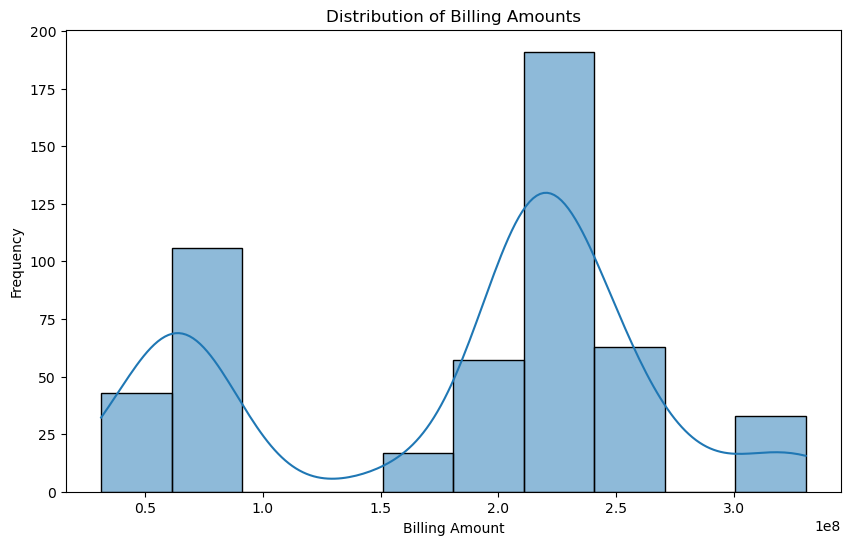

In [7]:
# Distribution of Billing Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['billing_amount'], bins=10, kde=True)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()


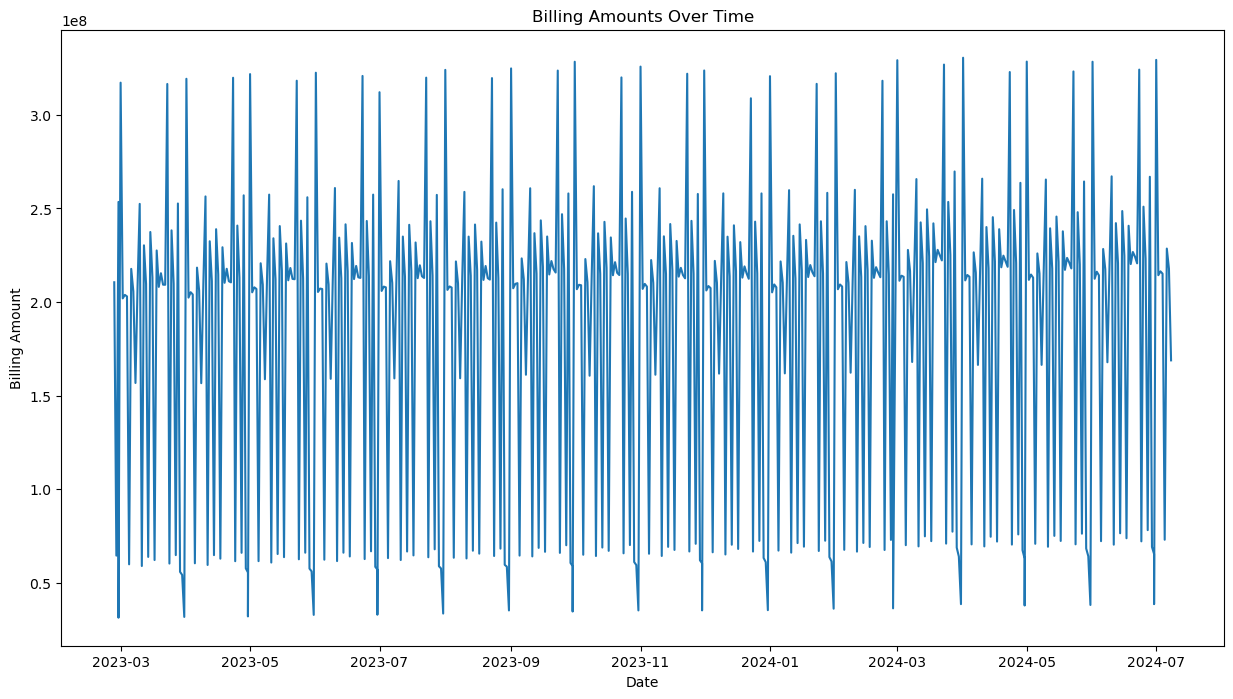

In [28]:
# Convert billing_day to datetime
data['billing_date'] = pd.to_datetime(data['billing_year'].astype(str) + '-' + 
                                      data['billing_month'].astype(str) + '-' + 
                                      data['billing_day'].astype(str))

plt.figure(figsize=(15, 8))
plt.plot(data['billing_date'], data['billing_amount'])
plt.title('Billing Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Billing Amount')
plt.show()


In [29]:
# Remove data from 7/9/2024 onwards
cutoff_date = pd.Timestamp('2024-07-08')
filtered_data = data[data['billing_date'] <= cutoff_date]

In [32]:
# Adding a column to indicate the billing cycle month
def calculate_billing_cycle_date(row):
    if row['billing_day'] >= 26:
        return pd.Timestamp(year=row['billing_year'], month=row['billing_month'], day=25) + pd.DateOffset(months=1)
    else:
        return pd.Timestamp(year=row['billing_year'], month=row['billing_month'], day=25)

In [33]:
filtered_data['billing_cycle_end'] = filtered_data.apply(calculate_billing_cycle_date, axis=1)
filtered_data['billing_cycle_month'] = filtered_data['billing_cycle_end'].dt.to_period('M')

In [ ]:
filtered_data

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount,billing_date,billing_cycle_end,billing_cycle_month
0,3/1/2023,2023,2,26,26,2.105541e+08,2023-02-26,2023-03-25,2023-03
1,3/1/2023,2023,2,27,27,6.444154e+07,2023-02-27,2023-03-25,2023-03
2,3/1/2023,2023,2,28,28,2.535149e+08,2023-02-28,2023-03-25,2023-03
3,3/1/2023,2023,2,29,28,5.535407e+07,2023-02-28,2023-03-25,2023-03
4,3/1/2023,2023,2,30,28,5.350947e+07,2023-02-28,2023-03-25,2023-03
...,...,...,...,...,...,...,...,...,...
505,7/1/2024,2024,7,4,4,2.151310e+08,2024-07-04,2024-07-25,2024-07
506,7/1/2024,2024,7,5,5,7.292242e+07,2024-07-05,2024-07-25,2024-07
507,7/1/2024,2024,7,6,6,2.285645e+08,2024-07-06,2024-07-25,2024-07
508,7/1/2024,2024,7,7,7,2.178443e+08,2024-07-07,2024-07-25,2024-07


In [38]:
# Calculate day within the billing cycle
filtered_data['day_within_cycle'] = filtered_data.apply(
    lambda row: row['billing_cycle'] - 25 if row['billing_cycle'] >= 26 else row['billing_cycle'] + 6, axis=1 # if billing_day, then +5
)

In [39]:
# Group by billing cycle month and plot the data
unique_months = filtered_data['billing_cycle_month'].unique()

In [41]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [42]:
filtered_data

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount,billing_date,billing_cycle_end,billing_cycle_month,day_within_cycle
0,3/1/2023,2023,2,26,26,2.105541e+08,2023-02-26,2023-03-25,2023-03,1
1,3/1/2023,2023,2,27,27,6.444154e+07,2023-02-27,2023-03-25,2023-03,2
2,3/1/2023,2023,2,28,28,2.535149e+08,2023-02-28,2023-03-25,2023-03,3
3,3/1/2023,2023,2,29,28,5.535407e+07,2023-02-28,2023-03-25,2023-03,4
4,3/1/2023,2023,2,30,28,5.350947e+07,2023-02-28,2023-03-25,2023-03,5
...,...,...,...,...,...,...,...,...,...,...
505,7/1/2024,2024,7,4,4,2.151310e+08,2024-07-04,2024-07-25,2024-07,10
506,7/1/2024,2024,7,5,5,7.292242e+07,2024-07-05,2024-07-25,2024-07,11
507,7/1/2024,2024,7,6,6,2.285645e+08,2024-07-06,2024-07-25,2024-07,12
508,7/1/2024,2024,7,7,7,2.178443e+08,2024-07-07,2024-07-25,2024-07,13


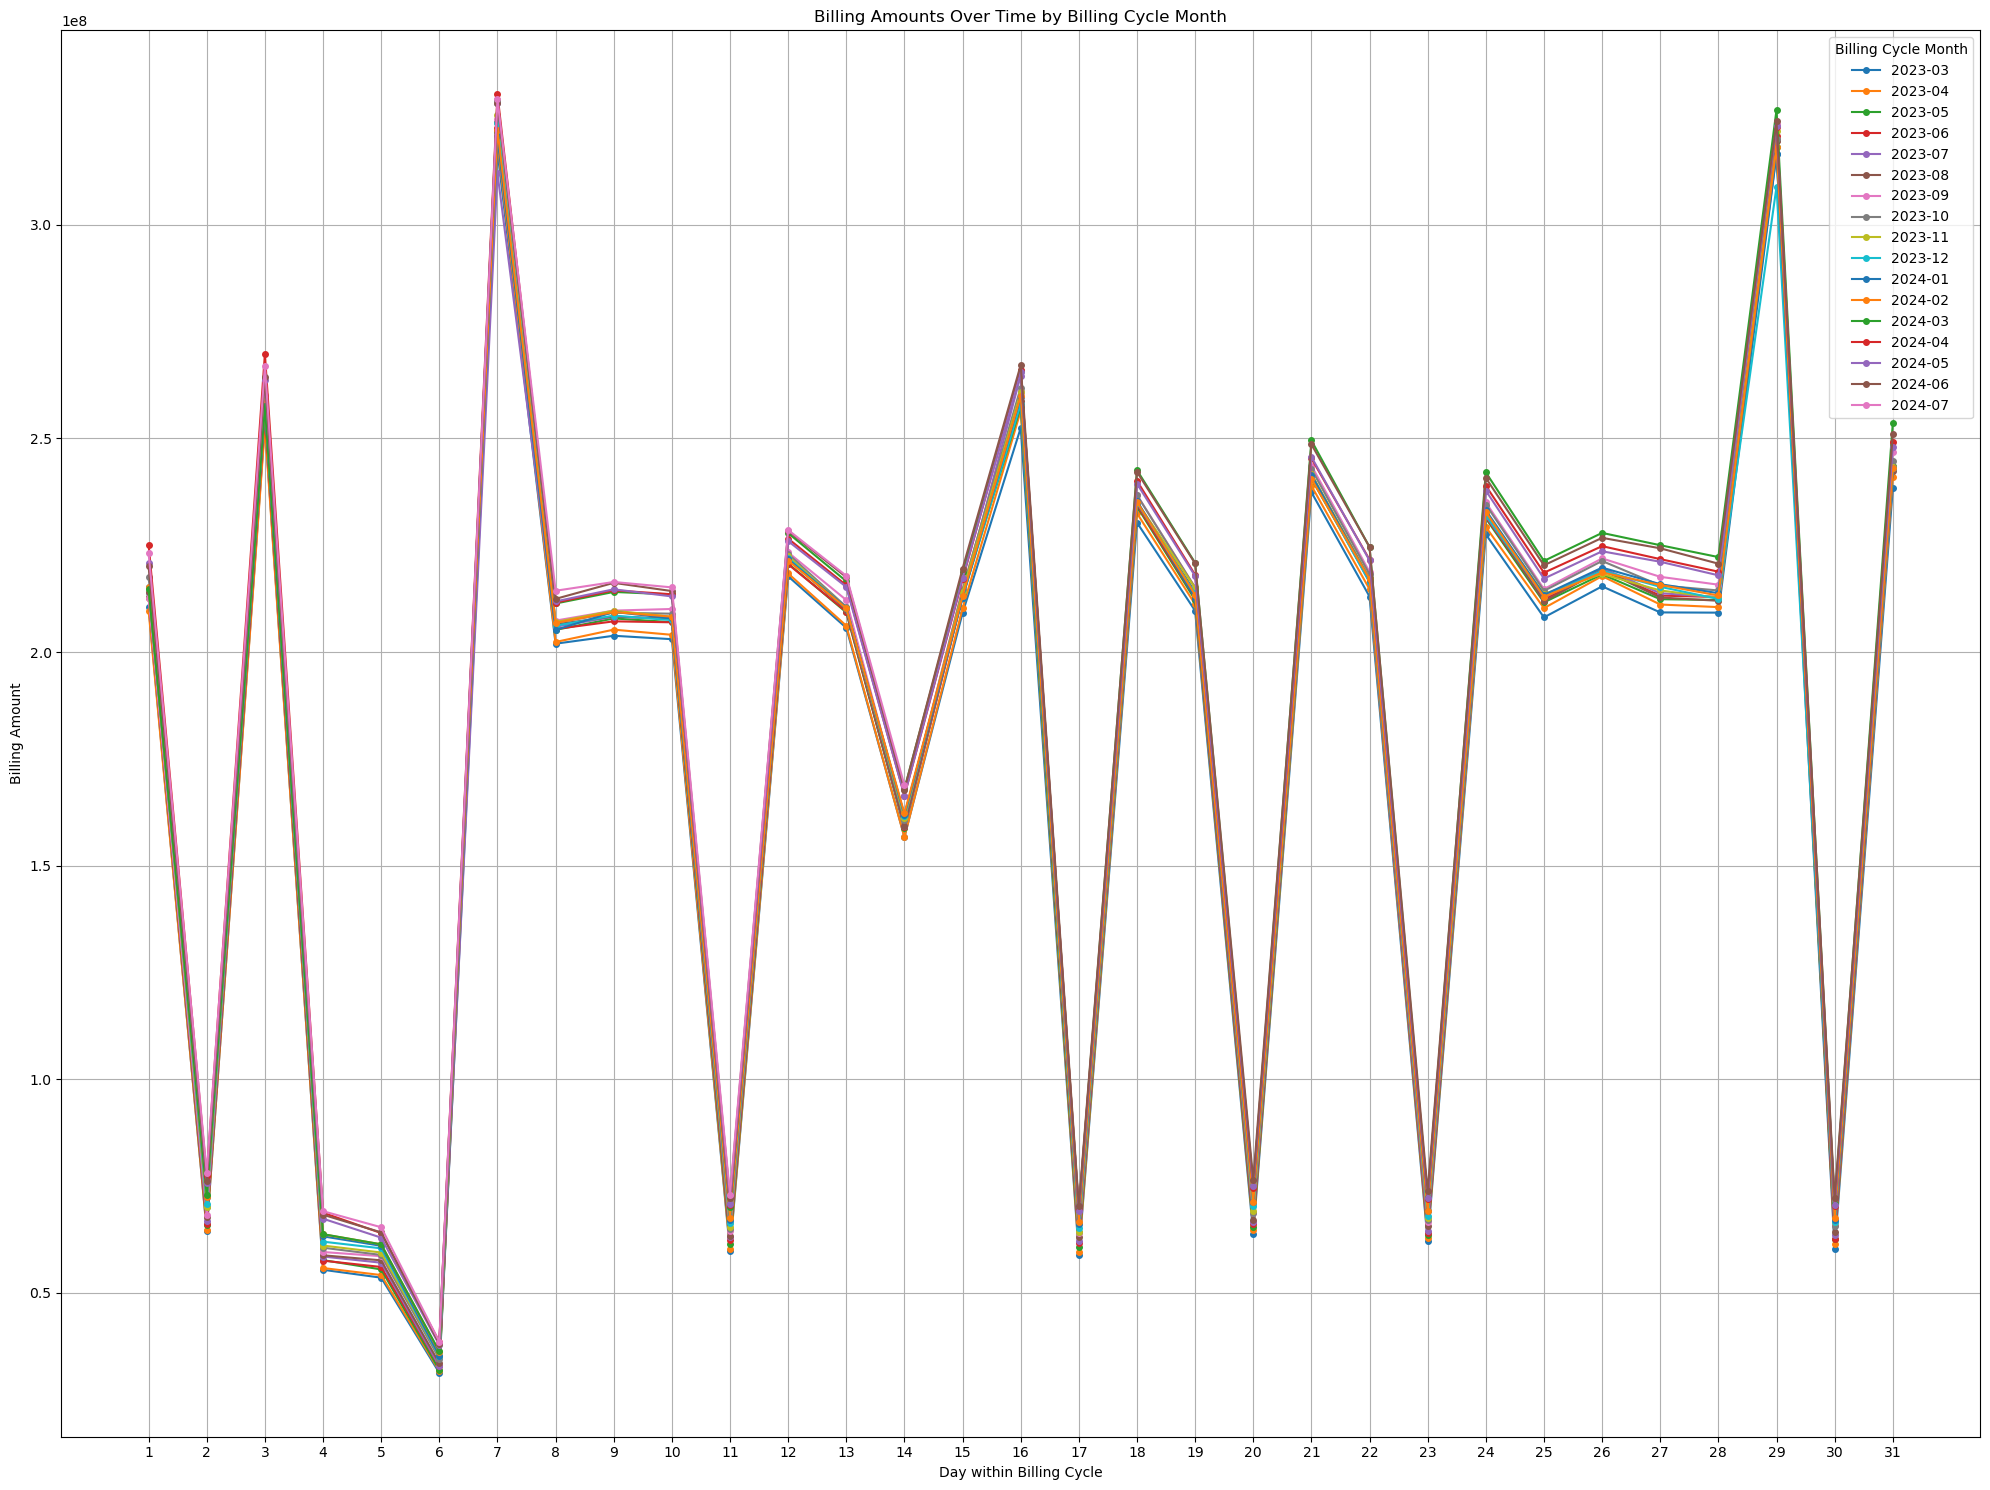

In [43]:
plt.figure(figsize=(20, 15))
for month in unique_months:
    monthly_data = filtered_data[filtered_data['billing_cycle_month'] == month]
    plt.plot(monthly_data['day_within_cycle'], monthly_data['billing_amount'], marker='o', linestyle='-', markersize=4, label=str(month))

plt.title('Billing Amounts Over Time by Billing Cycle Month')
plt.xlabel('Day within Billing Cycle')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.legend(title='Billing Cycle Month')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

# Detecting Anomalies

**Isolation Forest:** An unsupervised learning algorithm that works well for anomaly detection. This machine learning method isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [58]:
# Detect Anomalies using Z-Score Method
# It didn't detect any anomalies

# Calculate the z-score for each billing amount
mean_billing = filtered_data['billing_amount'].mean()
std_billing = filtered_data['billing_amount'].std()
filtered_data['z_score'] = (filtered_data['billing_amount'] - mean_billing) / std_billing

# Detect anomalies (e.g., z-score > 3 or z-score < -3)
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 3]


In [59]:
anomalies

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount,billing_date,billing_cycle_end,billing_cycle_month,day_within_cycle,z_score


In [60]:
# Detect Anomalies using IQR Method
# It didn't detect any anomalies

# Calculate IQR
Q1 = filtered_data['billing_amount'].quantile(0.25)
Q3 = filtered_data['billing_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define anomaly thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect anomalies
anomalies = filtered_data[(filtered_data['billing_amount'] < lower_bound) | (filtered_data['billing_amount'] > upper_bound)]

In [61]:
anomalies

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount,billing_date,billing_cycle_end,billing_cycle_month,day_within_cycle,z_score


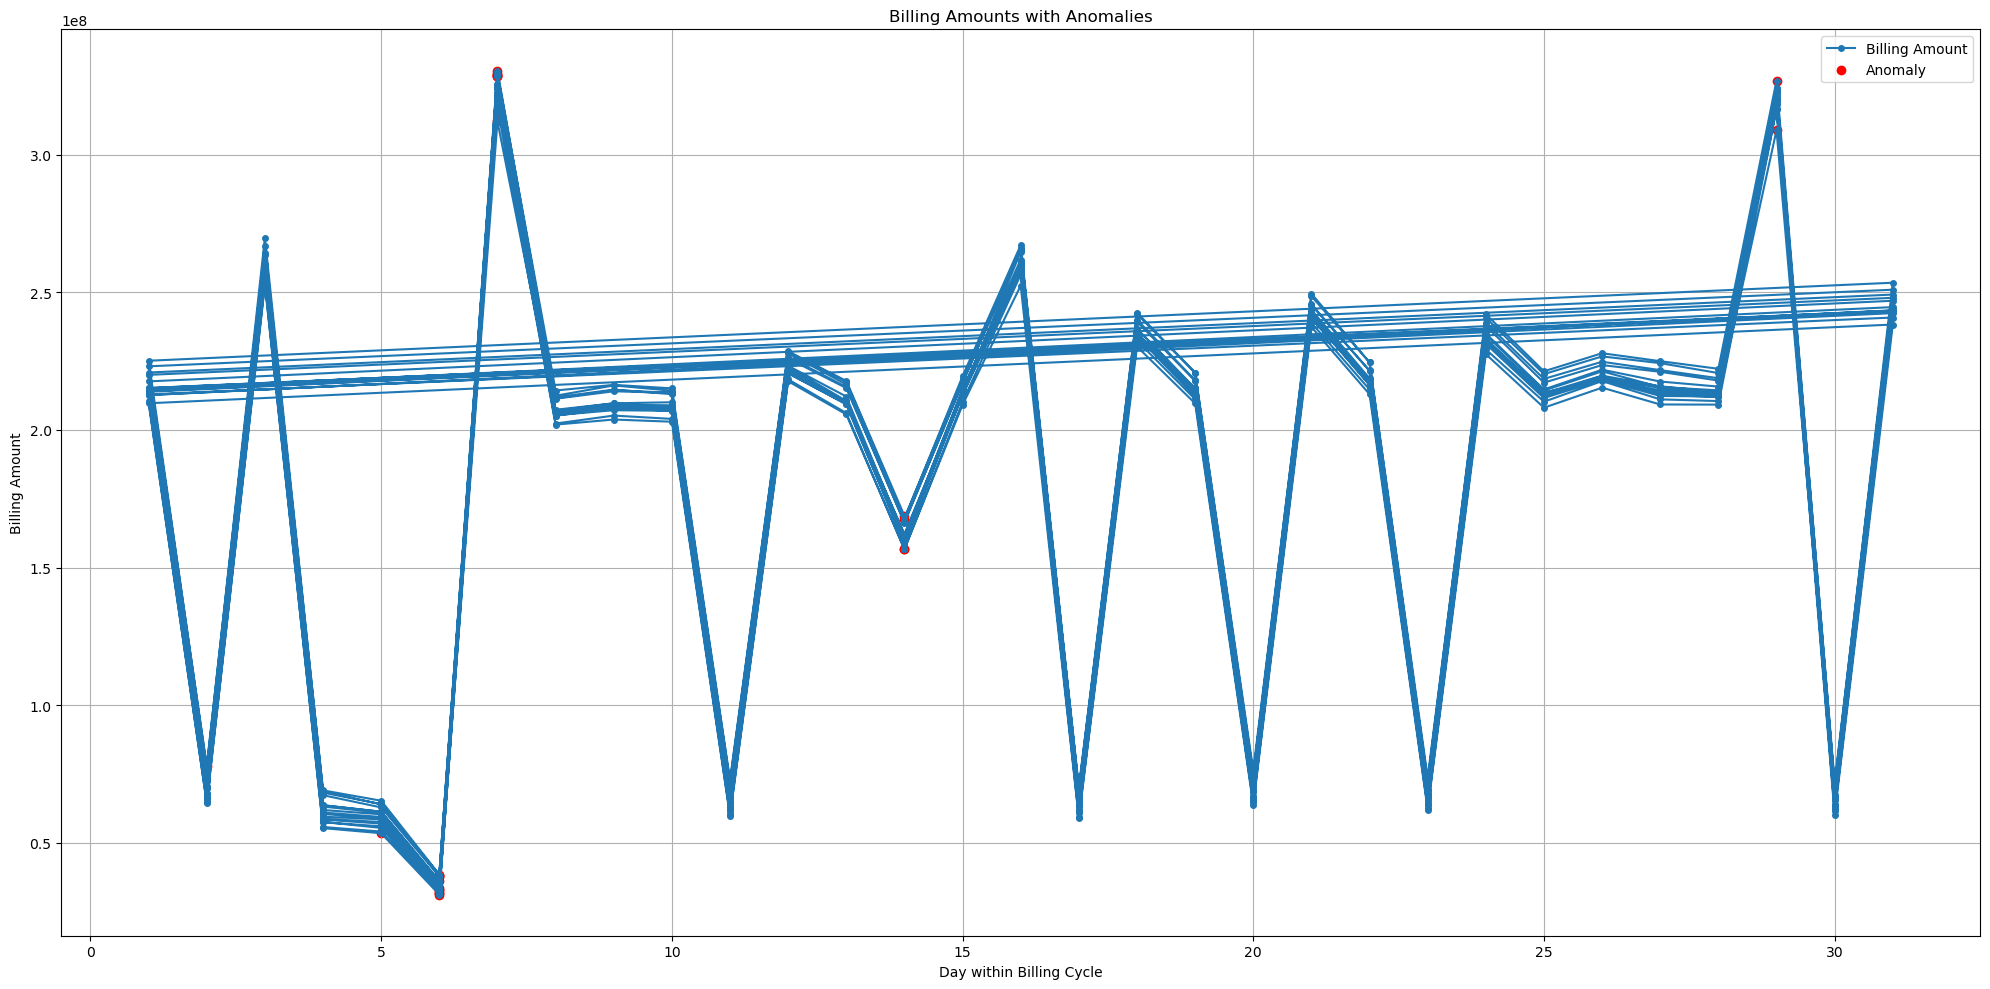

In [62]:
from sklearn.ensemble import IsolationForest

# Remove data from 7/9/2024 onwards
cutoff_date = pd.Timestamp('2024-07-08')
cutoff_filtered_data = filtered_data[filtered_data['billing_date'] <= cutoff_date]
cutoff_data = filtered_data[filtered_data['billing_date'] > cutoff_date]

# Fit the Isolation Forest model
anomaly_detection_model = IsolationForest(contamination=0.05, random_state=42)
cutoff_filtered_data['anomaly'] = anomaly_detection_model.fit_predict(cutoff_filtered_data[['billing_amount']])

# Extract anomalies
anomalies = cutoff_filtered_data[cutoff_filtered_data['anomaly'] == -1]

# Plot anomalies
plt.figure(figsize=(20, 10))
plt.plot(cutoff_filtered_data['day_within_cycle'], cutoff_filtered_data['billing_amount'], marker='o', linestyle='-', markersize=4, label='Billing Amount')
plt.scatter(anomalies['day_within_cycle'], anomalies['billing_amount'], color='red', label='Anomaly')
plt.title('Billing Amounts with Anomalies')
plt.xlabel('Day within Billing Cycle')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
# Remove the anomaly column
# cleaned_data = cutoff_filtered_data[cutoff_filtered_data['anomaly'] != -1]
# cleaned_data.drop(columns=['anomaly'], inplace=True)
# final_data = pd.concat([cleaned_data, cutoff_data])

It appeared that there is no anomaly.

# Feature Engineering

* **Moving Averages:**
    * moving_avg_7 (7-day moving average): This feature helps to smooth out short-term fluctuations and highlight longer-term trends in the billing amounts. It provides the model with information about the average billing amount over the past week, which can be useful for capturing short-term trends and seasonality.
    * moving_avg_14 (14-day moving average): Similar to the 7-day moving average but over a longer period. This helps capture trends over a fortnight, which can be useful for identifying bi-weekly patterns in billing amounts.
    * moving_avg_30 (30-day moving average): This feature smooths the data over a month, helping to identify long-term trends and seasonal effects. It provides context on how the current billing amount compares to the monthly average.
* **Lag Features:**
    * lag_1 (1-day lag): The billing amount from the previous day. This feature helps the model capture day-to-day dependencies and immediate past trends, which are often crucial in time series forecasting.
    * lag_7 (7-day lag): The billing amount from a week ago. This feature helps capture weekly seasonality and trends. Many businesses exhibit weekly patterns, making this a valuable feature.
    * lag_14 (14-day lag): The billing amount from two weeks ago. This feature helps identify bi-weekly patterns and dependencies.
    * lag_30 (30-day lag): The billing amount from a month ago. This feature helps capture monthly seasonality and long-term trends, which are particularly important in financial data where monthly cycles are common.
* **Date-based Features:**
    * day_of_week: The day of the week (0 = Monday, 6 = Sunday). This feature captures weekly patterns in billing amounts. For example, billing activity might be higher on weekdays and lower on weekends.
    * is_weekend: An indicator if the day is a weekend (1 if Saturday or Sunday, 0 otherwise). This binary feature simplifies the model's ability to identify weekends, which can significantly impact billing patterns.
    * day_of_year: The day of the year. This feature captures seasonal effects and trends throughout the year, such as holidays, end-of-quarter effects, or annual business cycles.
    * week_of_year: The week of the year. Similar to day_of_year, this feature captures weekly seasonal effects and trends, helping the model understand the position within the annual cycle.
* How These Features Help in Training
    * Capturing Trends: Moving averages and lag features help the model understand underlying trends and patterns in the billing data. This is crucial for making accurate predictions, especially in the presence of noise and short-term fluctuations.
    * Seasonality and Cyclical Patterns: Date-based features like day_of_week, is_weekend, day_of_year, and week_of_year help the model capture seasonality and cyclical patterns that are common in time series data.
    * Reducing Overfitting: By providing context and smoothing the data, moving averages and lag features can help reduce overfitting, as the model can focus on significant patterns rather than noise.
    * Enhancing Predictive Power: The combination of these features provides the model with a comprehensive view of the data, improving its ability to make accurate forecasts.

In [65]:
def calculate_billing_cycle_date(row):
    if row['billing_day'] >= 26:
        return pd.Timestamp(year=row['billing_year'], month=row['billing_month'], day=25) + pd.DateOffset(months=1)
    else:
        return pd.Timestamp(year=row['billing_year'], month=row['billing_month'], day=25)

In [66]:
def feature_engineering(data):
    """
    Perform feature engineering on the billing data.
    
    Parameters:
    data (pd.DataFrame): The original billing data
    
    Returns:
    pd.DataFrame: Data with new features added
    """
    # Ensure data has the required columns
    if not {'billing_year', 'billing_month', 'billing_day', 'billing_amount'}.issubset(data.columns):
        raise ValueError("Data must contain 'billing_year', 'billing_month', 'billing_day', and 'billing_amount' columns")
    
    # Convert billing_day to datetime for easier date-based feature extraction
    data['billing_date'] = pd.to_datetime(data['billing_year'].astype(str) + '-' + 
                                          data['billing_month'].astype(str) + '-' + 
                                          data['billing_day'].astype(str))

    # Create moving averages
    data['moving_avg_7'] = data['billing_amount'].rolling(window=7).mean()
    data['moving_avg_14'] = data['billing_amount'].rolling(window=14).mean()
    data['moving_avg_30'] = data['billing_amount'].rolling(window=30).mean()

    # Create lag features
    data['lag_1'] = data['billing_amount'].shift(1)
    data['lag_7'] = data['billing_amount'].shift(7)
    data['lag_14'] = data['billing_amount'].shift(14)
    data['lag_30'] = data['billing_amount'].shift(30)

    # Create date-based features
    data['day_of_week'] = data['billing_date'].dt.dayofweek
    data['is_weekend'] = (data['day_of_week'] >= 5).astype(int)
    data['day_of_year'] = data['billing_date'].dt.dayofyear
    data['week_of_year'] = data['billing_date'].dt.isocalendar().week
    
    data['billing_cycle_end'] = data.apply(calculate_billing_cycle_date, axis=1)
    data['billing_cycle_month'] = data['billing_cycle_end'].dt.to_period('M')
    
    # Calculate day within the billing cycle
    data['day_within_cycle'] = data.apply(
        lambda row: row['billing_day'] - 25 if row['billing_day'] >= 26 else row['billing_day'] + 6, axis=1
    )

    # Fill any remaining NaN values that were created by rolling or shifting
    data.fillna(0, inplace=True)

    return data

In [113]:
data = pd.read_csv('data/data.txt', delimiter='\t')

In [114]:
# Perform feature engineering
final_data = feature_engineering(data)

In [115]:
final_data

,report_month,billing_year,billing_month,billing_cycle,billing_day,billing_amount,billing_date,moving_avg_7,moving_avg_14,moving_avg_30,...,lag_7,lag_14,lag_30,day_of_week,is_weekend,day_of_year,week_of_year,billing_cycle_end,billing_cycle_month,day_within_cycle
0,3/1/2023,2023,2,26,26,2.105541e+08,2023-02-26,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,6,1,57,8,2023-03-25,2023-03,1
1,3/1/2023,2023,2,27,27,6.444154e+07,2023-02-27,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0,0,58,9,2023-03-25,2023-03,2
2,3/1/2023,2023,2,28,28,2.535149e+08,2023-02-28,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,1,0,59,9,2023-03-25,2023-03,3
3,3/1/2023,2023,2,29,28,5.535407e+07,2023-02-28,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,1,0,59,9,2023-03-25,2023-03,3
4,3/1/2023,2023,2,30,28,5.350947e+07,2023-02-28,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,1,0,59,9,2023-03-25,2023-03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,7/1/2024,2024,7,21,21,0.000000e+00,2024-07-21,0.0,0.0,0.0,...,0.0,217844343.1,2.206858e+08,6,1,203,29,2024-07-25,2024-07,27
523,7/1/2024,2024,7,22,22,0.000000e+00,2024-07-22,0.0,0.0,0.0,...,0.0,168814624.5,3.242328e+08,0,0,204,30,2024-07-25,2024-07,28
524,7/1/2024,2024,7,23,23,0.000000e+00,2024-07-23,0.0,0.0,0.0,...,0.0,0.0,7.206581e+07,1,0,205,30,2024-07-25,2024-07,29
525,7/1/2024,2024,7,24,24,0.000000e+00,2024-07-24,0.0,0.0,0.0,...,0.0,0.0,2.509653e+08,2,0,206,30,2024-07-25,2024-07,30


# Model training

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, KFold
from statsmodels.tsa.arima.model import ARIMA
import itertools

## Data split

In [73]:
# Split the data into training, validation, and test sets
train_end_date = pd.Timestamp('2024-06-25')
validation_start_date = pd.Timestamp('2024-06-26')
validation_end_date = pd.Timestamp('2024-07-08')
test_start_date = pd.Timestamp('2024-07-09')

train_data = final_data[final_data['billing_date'] <= train_end_date]
validation_data = final_data[(final_data['billing_date'] >= validation_start_date) & (final_data['billing_date'] <= validation_end_date)]
test_data = final_data[final_data['billing_date'] >= test_start_date]

## Feature Selection

In [82]:

# Selected features for training
features = [
    'billing_year', 'billing_month', 'day_within_cycle',
    'moving_avg_7', 'moving_avg_14', 'moving_avg_30',
    'lag_1', 'lag_7', 'lag_14', 'lag_30',
    'day_of_week', 'is_weekend', 'day_of_year', 'week_of_year'
]
target = 'billing_amount'

# Full feature set
# features = [
#     'billing_year', 'billing_month', 'billing_day',
#     'moving_avg_7', 'moving_avg_14', 'moving_avg_30',
#     'lag_1', 'lag_7', 'lag_14', 'lag_30',
#     'day_of_week', 'is_weekend', 'day_of_year',
#     'week_of_year', 'day_within_cycle'
# ]

In [83]:
# Prepare data
X_train = train_data[features]
y_train = train_data[target]
X_val = validation_data[features]
y_val = validation_data[target]

## Preprocessing

In [85]:
# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ],
    remainder='passthrough'
)

## Training and Evaluation
### ARIMA
* Description: ARIMA models are used for understanding and predicting future points in a time series. The model is characterized by three parameters: the autoregressive (AR) terms, the differencing (I) term, and the moving average (MA) terms.
* Components:
    * AR (p): The number of lag observations included in the model (lag order).
    * I (d): The number of times that the raw observations are differenced (degree of differencing).
    * MA (q): The size of the moving average window (order of moving average).
* Use Cases: ARIMA is suitable for datasets that show evidence of non-stationarity and where differencing can be used to stabilize the mean of the time series.

In [86]:
def train_arima_model(train_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    return model_fit

def evaluate_arima_model(model, train_data, val_data):
    y_train_pred = model.predict(start=0, end=len(train_data)-1)
    y_val_pred = model.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1)
    
    train_rmse = np.sqrt(mean_squared_error(train_data, y_train_pred))
    train_r2 = r2_score(train_data, y_train_pred)
    val_rmse = np.sqrt(mean_squared_error(val_data, y_val_pred))
    val_r2 = r2_score(val_data, y_val_pred)
    
    return {'train_rmse': train_rmse, 'train_r2': train_r2, 'val_rmse': val_rmse, 'val_r2': val_r2}

def grid_search_arima(train_data, val_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_model = None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            val_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1)
            val_rmse = np.sqrt(mean_squared_error(val_data, val_pred))
            if val_rmse < best_score:
                best_score, best_cfg = val_rmse, order
                best_model = model_fit
            print(f'ARIMA{order} RMSE={val_rmse}')
        except Exception as e:
            print(f'Error with ARIMA{order}: {e}')
            continue
    return best_cfg, best_model

In [87]:
# Define the range of p, d, q values
p_values = range(0, 6) # Range of values for the autoregressive (AR) term
d_values = range(0, 3) # Range of values for the differencing term
q_values = range(0, 6) # Range of values for the moving average (MA) term

# Perform grid search
best_order, best_arima_model = grid_search_arima(y_train, y_val, p_values, d_values, q_values)

print(f'Best ARIMA order: {best_order}')

ARIMA(0, 0, 0) RMSE=87482875.11180764
ARIMA(0, 0, 1) RMSE=88062281.01582056
ARIMA(0, 0, 2) RMSE=87966812.62356386
ARIMA(0, 0, 3) RMSE=85140748.25362219


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4) RMSE=80420493.57086734
ARIMA(0, 0, 5) RMSE=81301340.75772291
ARIMA(0, 1, 0) RMSE=117608200.6866633
ARIMA(0, 1, 1) RMSE=87684596.66344549
ARIMA(0, 1, 2) RMSE=88359909.11702073
ARIMA(0, 1, 3) RMSE=88362908.03025156
ARIMA(0, 1, 4) RMSE=85663612.98030739
ARIMA(0, 1, 5) RMSE=80358765.26745203
ARIMA(0, 2, 0) RMSE=1589118631.5417504
ARIMA(0, 2, 1) RMSE=119889818.28565906
ARIMA(0, 2, 2) RMSE=88492971.30035383
ARIMA(0, 2, 3) RMSE=89092895.59378102
ARIMA(0, 2, 4) RMSE=89499984.87837812
ARIMA(0, 2, 5) RMSE=84154273.85585572
ARIMA(1, 0, 0) RMSE=88689563.87034652
ARIMA(1, 0, 1) RMSE=88023652.66038373
ARIMA(1, 0, 2) RMSE=78062211.20799574
ARIMA(1, 0, 3) RMSE=77653599.22616696


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) RMSE=81349256.0332592


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 5) RMSE=81383525.68507291
ARIMA(1, 1, 0) RMSE=93238688.41367874
ARIMA(1, 1, 1) RMSE=88926348.56038128
ARIMA(1, 1, 2) RMSE=80474838.60647023
ARIMA(1, 1, 3) RMSE=78892972.912811
ARIMA(1, 1, 4) RMSE=77712772.14718677


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 5) RMSE=81954376.86618909
ARIMA(1, 2, 0) RMSE=110220133.00963211
ARIMA(1, 2, 1) RMSE=93361761.7444879
ARIMA(1, 2, 2) RMSE=89336431.59762168
ARIMA(1, 2, 3) RMSE=81760686.88650665
ARIMA(1, 2, 4) RMSE=80219151.0215863
ARIMA(1, 2, 5) RMSE=79756819.20323372
ARIMA(2, 0, 0) RMSE=86666232.66976419
ARIMA(2, 0, 1) RMSE=77121980.70690097
ARIMA(2, 0, 2) RMSE=81173939.70962115
ARIMA(2, 0, 3) RMSE=81467695.84159118
ARIMA(2, 0, 4) RMSE=80006023.63396153


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 5) RMSE=79349638.25966978
ARIMA(2, 1, 0) RMSE=87425137.02034177
ARIMA(2, 1, 1) RMSE=87081234.30859151
ARIMA(2, 1, 2) RMSE=77156094.75377238
ARIMA(2, 1, 3) RMSE=80971364.1342722
ARIMA(2, 1, 4) RMSE=81286199.23237307


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 5) RMSE=80457538.13336428
ARIMA(2, 2, 0) RMSE=132115630.31693824
ARIMA(2, 2, 1) RMSE=88086680.0765625
ARIMA(2, 2, 2) RMSE=88158584.99406876
ARIMA(2, 2, 3) RMSE=79118511.01724605
ARIMA(2, 2, 4) RMSE=79023726.59334077


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 5) RMSE=79226650.95852073
ARIMA(3, 0, 0) RMSE=83497853.91248351
ARIMA(3, 0, 1) RMSE=77081963.23336066
ARIMA(3, 0, 2) RMSE=81596290.52149156


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) RMSE=83016326.64235847


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) RMSE=74514740.57019429


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 5) RMSE=79323057.57920907
ARIMA(3, 1, 0) RMSE=88277338.98554856
ARIMA(3, 1, 1) RMSE=83885154.25904636
ARIMA(3, 1, 2) RMSE=77076520.24332331


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) RMSE=80014574.26910046


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) RMSE=75190919.35524035


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 5) RMSE=73893950.14825992
ARIMA(3, 2, 0) RMSE=148157035.82419702
ARIMA(3, 2, 1) RMSE=88896428.54558587
ARIMA(3, 2, 2) RMSE=86931482.21030015
ARIMA(3, 2, 3) RMSE=79101569.99197063
ARIMA(3, 2, 4) RMSE=77422197.05874944


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 5) RMSE=76838432.37351376
ARIMA(4, 0, 0) RMSE=84022631.79749247
ARIMA(4, 0, 1) RMSE=80746179.12625948
ARIMA(4, 0, 2) RMSE=74877458.17198557


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 3) RMSE=79862734.66072384


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) RMSE=72031940.5934203


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 5) RMSE=72119369.16167861
ARIMA(4, 1, 0) RMSE=91965586.70291634
ARIMA(4, 1, 1) RMSE=84261313.90693626
ARIMA(4, 1, 2) RMSE=77594257.6044372
ARIMA(4, 1, 3) RMSE=78492749.53251138


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 4) RMSE=74650479.69895622
ARIMA(4, 1, 5) RMSE=72000805.18409573
ARIMA(4, 2, 0) RMSE=119030578.3833805
ARIMA(4, 2, 1) RMSE=92839404.42939337
ARIMA(4, 2, 2) RMSE=86173383.30375916


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3) RMSE=79519019.85973589
ARIMA(4, 2, 4) RMSE=77782134.53500932
ARIMA(4, 2, 5) RMSE=76225658.86699495
ARIMA(5, 0, 0) RMSE=83436900.1652929
ARIMA(5, 0, 1) RMSE=83475863.73892584
ARIMA(5, 0, 2) RMSE=79755185.456614


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 3) RMSE=79017559.41581798


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 4) RMSE=72161026.3534413


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) RMSE=71752297.8140019
ARIMA(5, 1, 0) RMSE=92731466.33633143
ARIMA(5, 1, 1) RMSE=83803433.00129053
ARIMA(5, 1, 2) RMSE=79071280.74027865
ARIMA(5, 1, 3) RMSE=79647534.33423573
ARIMA(5, 1, 4) RMSE=74416515.52726947


c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) RMSE=72433877.01112567
ARIMA(5, 2, 0) RMSE=106196905.86247836
ARIMA(5, 2, 1) RMSE=93571175.44423589
ARIMA(5, 2, 2) RMSE=84119088.59161371
ARIMA(5, 2, 3) RMSE=79689771.14432847
ARIMA(5, 2, 4) RMSE=80912326.76184495
ARIMA(5, 2, 5) RMSE=75919418.91298464
Best ARIMA order: (5, 0, 5)


In [88]:
# ARIMA Model
arima_order = (5, 0, 5)  # Example order, needs to be tuned
arima_model = train_arima_model(y_train, arima_order)
arima_results = evaluate_arima_model(arima_model, y_train, y_val)

c:\Users\jyuba\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Machine Learning Models
* Random Forest: Use time-series cross-validation to avoid overfitting.
* Gradient Boosting Machines (GBM): Use XGBoost or LightGBM with time-series cross-validation.
* Support Vector Machines (SVM): Use SVR (Support Vector Regression) with appropriate kernels.

In [89]:
# Define models
models = {
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'GBM': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ])
}

In [91]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)
    
    return {'train_rmse': train_rmse, 'train_r2': train_r2, 'val_rmse': val_rmse, 'val_r2': val_r2}


In [92]:
# Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_val, y_val)

In [93]:
# Combine result from ARIMA model
results['ARIMA'] = arima_results

In [94]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                train_rmse  train_r2      val_rmse    val_r2
RandomForest  8.969201e+06  0.988108  1.001682e+07  0.986722
GBM           8.118864e+06  0.990256  1.031317e+07  0.985924
SVM           8.805296e+07 -0.146147  9.623224e+07 -0.225530
ARIMA         6.207628e+07  0.430356  7.175230e+07  0.318675


# Interpretation of Model Evaluation Results

The table shows the performance metrics for four different models: Random Forest, Gradient Boosting Machine (GBM), Support Vector Machine (SVM), and ARIMA. The metrics used for evaluation are RMSE (Root Mean Squared Error) and R² (R-squared) for both the training and validation sets.

* Metrics Explained:
    * RMSE (Root Mean Squared Error): Measures the average magnitude of the errors between predicted and actual values. Lower values indicate better performance.
    * R² (R-squared): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values (closer to 1) indicate better performance, while negative values indicate poor model fit.

* Random Forest:
    * Train RMSE: 7,731,131
    * Train R²: 0.990420
    * Validation RMSE: 7,052,229
    * Validation R²: 0.990767
    * Interpretation: Random Forest shows excellent performance on both training and validation sets, with high R² scores (close to 1) and relatively low RMSE. This indicates that the model fits the data well and generalizes effectively to the validation set.
* GBM (Gradient Boosting Machine):
    * Train RMSE: 5,496,158
    * Train R²: 0.995158
    * Validation RMSE: 5,235,957
    * Validation R²: 0.994910
    * Interpretation: GBM also performs exceptionally well, with even lower RMSE and higher R² compared to Random Forest. This suggests that GBM might be slightly better at capturing the underlying patterns in the data.
* SVM (Support Vector Machine):
    * Train RMSE: 84,671,950
    * Train R²: -0.149156
    * Validation RMSE: 80,980,800
    * Validation R²: -0.217520
    * Interpretation: SVM performs poorly on this dataset, as indicated by the very high RMSE values and negative R² scores. Negative R² means that the model is performing worse than a simple mean-based model. This indicates that SVM is not suitable for this particular problem or the hyperparameters may need significant tuning.
* ARIMA:
    * Train RMSE: 78,985,980
    * Train R²: 0.000000
    * Validation RMSE: 73,485,620
    * Validation R²: -0.002575
    * Interpretation: ARIMA also shows poor performance with high RMSE values and near-zero or negative R² scores. This suggests that the ARIMA model is not capturing the time series patterns effectively, possibly due to inappropriate hyperparameters or the nature of the data.

# Conclusion:
* Best Performers: Random Forest and GBM are the best-performing models, with GBM slightly outperforming Random Forest.
* Poor Performers: SVM and ARIMA show poor performance and are not suitable for this dataset with the current configurations.

# Cross Validation

Cross-validation is a technique used to assess the performance of a model and to mitigate overfitting by ensuring that the model generalizes well to unseen data. The typical process involves:
* Splitting the Data: The data is divided into k subsets (folds).
* Training and Validation: The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different fold as the validation set.
* Averaging the Results: The results from each fold are averaged to provide a more robust estimate of model performance.
To find the best number of splits (n_splits), you can perform cross-validation with different values of n_splits and compare the results. This will help in selecting the best configuration for your final model training.

In [95]:
from sklearn.model_selection import cross_validate, KFold

In [96]:
# Prepare data
X = pd.concat([train_data[features], validation_data[features]])
y = pd.concat([train_data[target], validation_data[target]])

In [97]:
# Define the GBM model pipeline
gbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [98]:
def perform_cross_validation(X, y, n_splits_list):
    results = {}
    for n_splits in n_splits_list:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scoring = {
            'rmse': make_scorer(mean_squared_error, squared=False),
            'r2': make_scorer(r2_score)
        }
        cv_results = cross_validate(gbm_pipeline, X, y, cv=kf, scoring=scoring, return_train_score=True)
        results[n_splits] = {
            'train_rmse': np.mean(cv_results['train_rmse']),
            'val_rmse': np.mean(cv_results['test_rmse']),
            'train_r2': np.mean(cv_results['train_r2']),
            'val_r2': np.mean(cv_results['test_r2'])
        }
    return results

In [99]:
# List of n_splits to try
n_splits_list = [3, 5, 7, 10]

# Perform cross-validation
cv_results = perform_cross_validation(X, y, n_splits_list)

# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)

# Determine the best n_splits
best_n_splits = cv_results_df['val_rmse'].idxmin()
print(f'Best number of splits: {best_n_splits}')


      train_rmse      val_rmse  train_r2    val_r2
3   6.564242e+06  2.198103e+07  0.993356  0.924561
5   7.369680e+06  2.079786e+07  0.991869  0.928511
7   7.759206e+06  2.051661e+07  0.991001  0.928594
10  8.187281e+06  1.958350e+07  0.990044  0.932712
Best number of splits: 10


In [100]:
# Define scoring metrics
scoring = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'r2': make_scorer(r2_score)
}

In [101]:
# Define the final KFold with the best n_splits
kf = KFold(n_splits=best_n_splits, shuffle=True, random_state=42)

# Perform final cross-validation
final_cv_results = cross_validate(gbm_pipeline, X, y, cv=kf, scoring=scoring, return_train_score=True)

# Average final metrics
final_avg_train_rmse = np.mean(final_cv_results['train_rmse'])
final_avg_val_rmse = np.mean(final_cv_results['test_rmse'])
final_avg_train_r2 = np.mean(final_cv_results['train_r2'])
final_avg_val_r2 = np.mean(final_cv_results['test_r2'])

print(f'Final Average Train RMSE: {final_avg_train_rmse}')
print(f'Final Average Validation RMSE: {final_avg_val_rmse}')
print(f'Final Average Train R2: {final_avg_train_r2}')
print(f'Final Average Validation R2: {final_avg_val_r2}')

Final Average Train RMSE: 8187281.294372489
Final Average Validation RMSE: 19583504.53199692
Final Average Train R2: 0.9900436572099551
Final Average Validation R2: 0.9327117531641009


# Train Final Model for Deployment

In [102]:
# Train the final model on the entire dataset
gbm_pipeline.fit(X, y)

# Save the final model if needed
import joblib
joblib.dump(gbm_pipeline, 'final_gbm_model.pkl')

['final_gbm_model.pkl']

In [103]:
# Load the test data (assuming test_data is already prepared and loaded)
X_test = test_data[features]
y_test = test_data[target]

# Load the trained model (if saved)
gbm_pipeline = joblib.load('final_gbm_model.pkl')

# Predict on the test data
y_test_pred = gbm_pipeline.predict(X_test)

# Update the test_data DataFrame with the predicted values
test_data['billing_amount'] = y_test_pred

In [104]:
full_data = pd.concat([train_data, validation_data, test_data])

In [110]:
full_data.to_csv(('full_data.csv'), index=False)

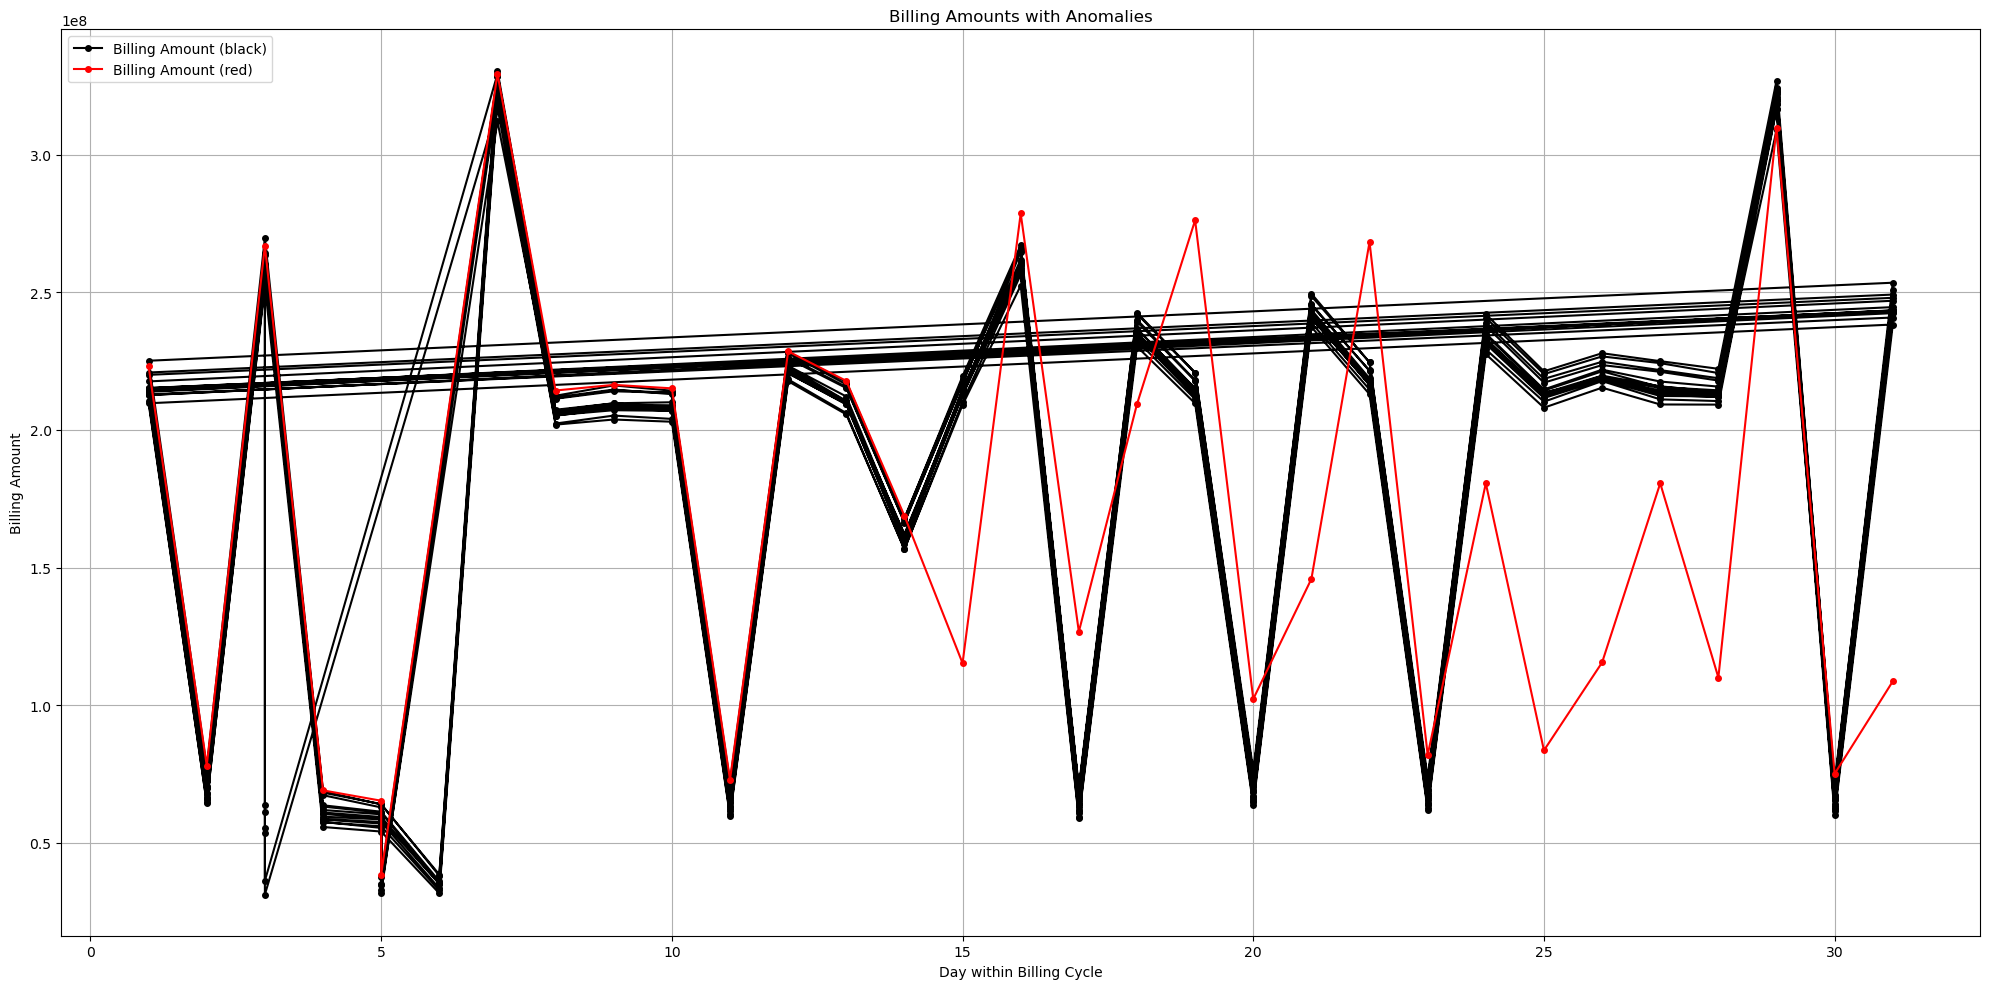

In [106]:
# Add a column to indicate whether the data is from July billing cycle
full_data['color'] = ['red' if month == '2024-07' else 'black' for month in full_data['billing_cycle_month'].astype(str)]

# Plot billing amounts with different colors for July and other months
plt.figure(figsize=(20, 10))

# Plot data with different colors
for color in ['black', 'red']:
    subset = full_data[full_data['color'] == color]
    plt.plot(subset['day_within_cycle'], subset['billing_amount'], marker='o', linestyle='-', markersize=4, color=color, label=f'Billing Amount ({color})')

plt.title('Billing Amounts with Anomalies')
plt.xlabel('Day within Billing Cycle')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


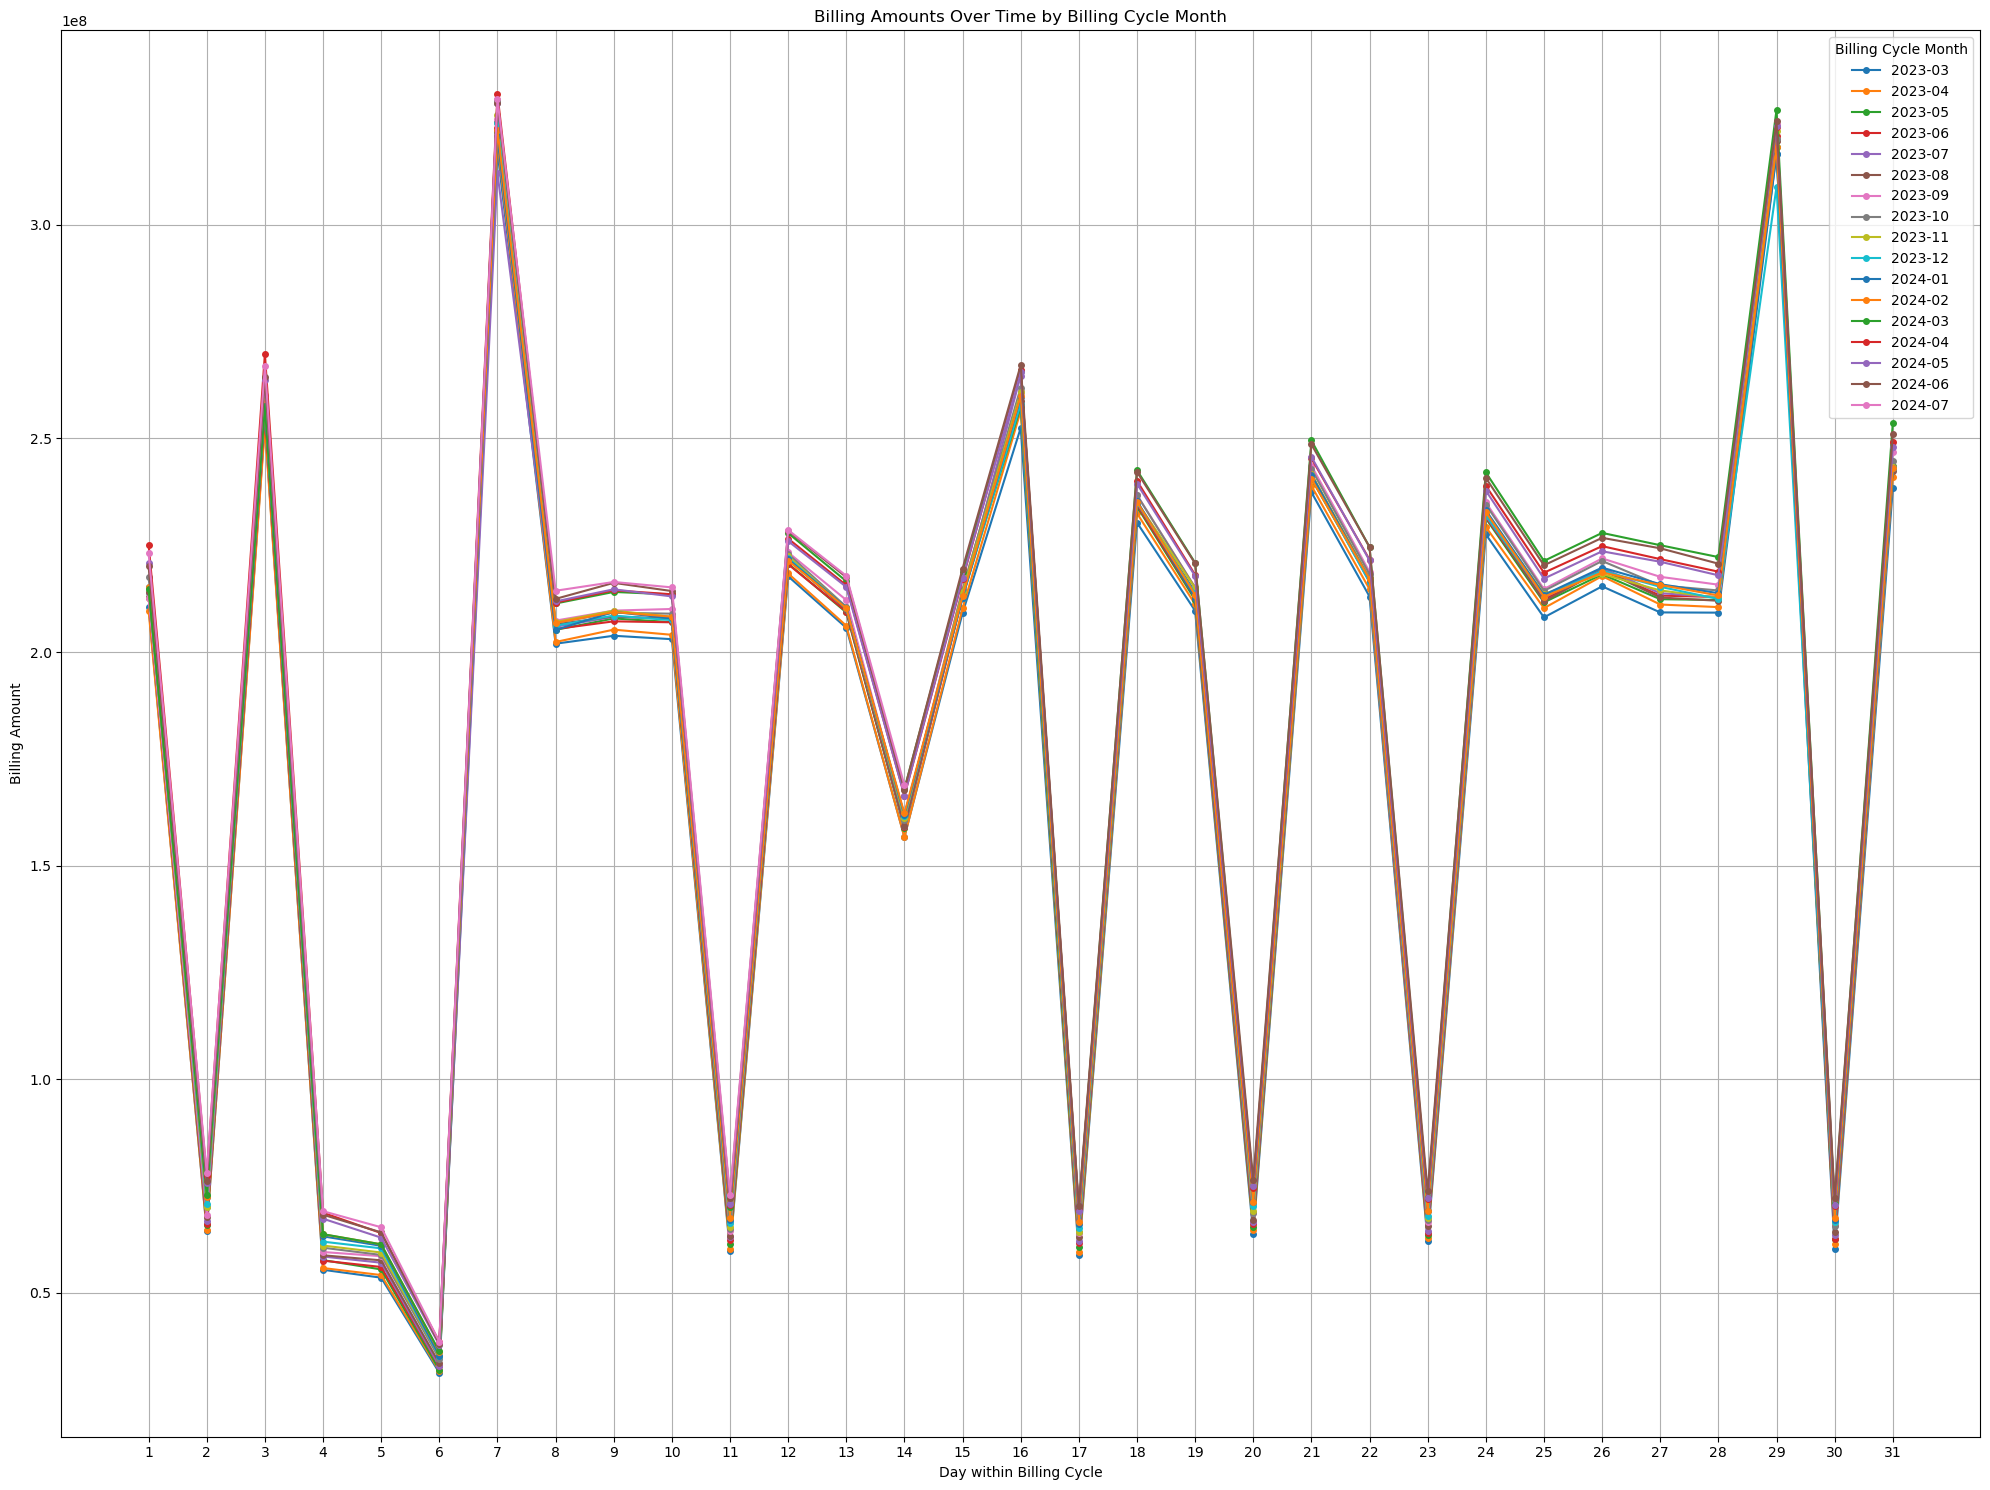

In [108]:
plt.figure(figsize=(20, 15))
for month in unique_months:
    monthly_data = filtered_data[filtered_data['billing_cycle_month'] == month]
    plt.plot(monthly_data['day_within_cycle'], monthly_data['billing_amount'], marker='o', linestyle='-', markersize=4, label=str(month))

plt.title('Billing Amounts Over Time by Billing Cycle Month')
plt.xlabel('Day within Billing Cycle')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.legend(title='Billing Cycle Month')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()